#Examining a reported link between solar phase at birth and human health from Norwegian Historical Church records

Analysis of [Skjaervo et al. (2014)](http://dx.doi.org/10.1098/rspb.2014.2032), who concluded that Solar activity at birth predicted infant survival and women’s fertility in historical Norway.

Solar data taken from  [Usoskin, et al. (2002), A physical reconstruction of cosmic ray intensity since 1610. J. Geophys. Res., 107 (A11), 1374](http://cc.oulu.fi/~usoskin/personal/2002ja009343.pdf). [Access original data here](ftp://ftp.ncdc.noaa.gov/pub/data/paleo/climate_forcing/solar_variability/usoskin-cosmic-ray.txt)

All data has been converted to CSV format and placed on a publicly accessible server. Reading the data from the web is automatic using the pandas module below.

Code by Benjamin A. Laken: e-mail blaken@geo.uio.no   web: [benlaken.com](http://www.benlaken.com)

###Notes on the Original study:

Abstract of Skjaervo et al. (2014):

>*Ultraviolet radiation (UVR) can suppress essential molecular and cellular mech- anisms during early development in living organisms and variations in solar activity during early development may thus influence their health and repro- duction. Although the ultimate consequences of UVR on aquatic organisms in early life are well known, similar studies on terrestrial vertebrates, including humans, have remained limited. Using data on temporal variation in sunspot numbers and individual-based demographic data (N1⁄48662 births) from Norway between 1676 and 1878, while controlling for maternal effects, socioe- conomic status, cohort and ecology, we show that solar activity (total solar irradiance) at birth decreased the probability of survival to adulthood for both men and women. On average, the lifespans of individuals born in a solar maximum period were 5.2 years shorter than those born in a solar mini- mum period. In addition, fertility and lifetime reproductive success (LRS) were reduced among low-status women born in years with high solar activity. The proximate explanation for the relationship between solar activity and infant mortality may be an effect of folate degradation during pregnancy caused by UVR. Our results suggest that solar activity at birth may have consequences for human lifetime performance both within and between generations.*

**Notes on the data**:

An individual-based dataset from two human populations in Norway that spans 160 years. The data include information regarding natural fertility and mortality.

Norwegian church records of two different populations in mid-Norway that included 9062 individuals born between 1676 and 1878. The two populations were located at similar latitudes (638N) and experienced similar climatic conditions.
Smøla Group: a coastal island population at low altitude (0 to 70 m.a.s.l). 
Soknedal Group: an inland population at higher altitude (200 to 600 m.a.s.l). 
Both populations had  two distinct socioeconomic groups, a low (poor) or high (wealthy) status group.

The chief demographic characteristics of both populations during the study period can be described as strictly monogamous, where both men and women married late and experienced moderate infant mortality and natural fertility.

Solar activity, measured as the number of sunspots (SS) observed on the solar surface, varies in an 11-year cycle, with 8 years of low activity (solar minimum—SSmin) followed by 3 years of high activity (solar maximum—SSmax). The mean annual numbers of sunspots were downloaded from a [NOAA website](http://solarscience.msfc.nasa.gov/SunspotCycle.shtml).

**Hypothesis under examination:** High solar activity during early development affects human life traits (survival, fertility and reproductive sucess) with diffrences between gender and age. 

Specifically, testing if solar activity at birth is: 
1. Related to the probability of survival from birth to the age of 20 years. 
2. Related to fertility. 
3. Related to reproductive success (LRS). 

*Male/Females analysed separately as UV radition has been found to affect men and women differently (and the hypothesised mechanisim linking solar activity to human health relates to UV radiation).*

Two different measures were used to capture the variation in fitness: fertility (number of children born) and LRS (number of children surviving to the age of 20 years)

In [1]:
from __future__ import print_function,division,generators
from IPython.display import Image, display, display_png, HTML
%pylab inline
import pandas as pd
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


### Fetch the data from web source using Pandas

In [2]:
Adults = pd.read_csv('http://www.files.benlaken.com/documents/Adults.csv')    # Very nice!
Kids = pd.read_csv('http://www.files.benlaken.com/documents/Kids.csv')
Survival =pd.read_csv('http://www.files.benlaken.com/documents/Survival.csv')
DeathAge =pd.read_csv('http://www.files.benlaken.com/documents/age_death.csv')
Solar = pd.read_csv('http://www.files.benlaken.com/documents/Usoskin.csv')     # Read solar dataset also
Solar.index = Solar.Year                    # Index the solar data by year
#Adults.index = Adults.Born                 # Index the data by the year of birth
#Adults                                     # Preview the data

### Simple calls to the database to generate summary statistics

In [3]:
# Construct some summary data of number of people born per year

trange=arange(min(Adults.Born),max(Adults.Born))  # Generate a list of all years of data

BirthsPerYr = [len(Adults.Born[Adults.Born == year]) for year in trange] # How many adults born each year?

BirthsPerYr_GA = [len(Adults.Born[(Adults.Born == year) & (Adults.Group == 'A')])
                  for year in trange]                      
BirthsPerYr_GB = [len(Adults.Born[(Adults.Born == year) & (Adults.Group == 'B')])
                  for year in trange] 

BirthsPerYr = pd.Series(data=BirthsPerYr,index=trange)   # Make these pd series objects
BirthsPeYr_GA = pd.Series(data=BirthsPerYr_GB,index=trange)
BirthsPerYr_GB = pd.Series(data=BirthsPerYr_GB,index=trange)

### Simple data viz. with Matplotlib

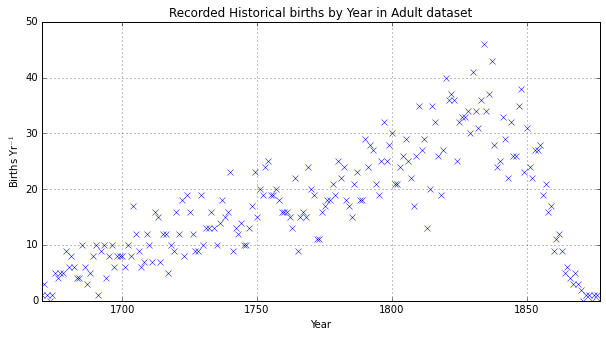

In [4]:
fig1 = plt.figure()
fig1.set_size_inches(10,5) 
ax1 = fig1.add_subplot(111) 
ax1.plot(trange,BirthsPerYr,'xb')
ax1.set_xlim(min(trange),max(trange))
ax1.set_xlabel('Year')
ax1.set_ylabel(r'Births Yr$^{-1}$')
ax1.set_title(r'Recorded Historical births by Year in Adult dataset')
plt.grid(True)
plt.show(fig1)

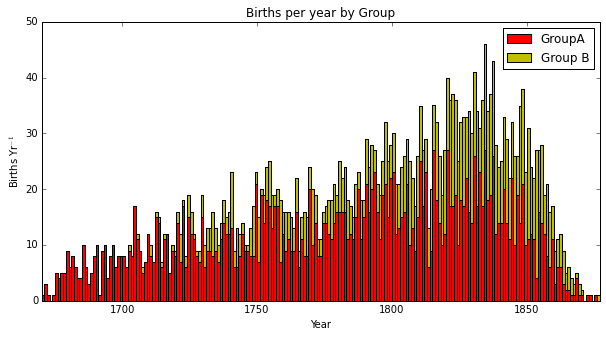

In [5]:
fig2 = plt.figure()
fig2.set_size_inches(10,5) 
ax1 = fig2.add_subplot(111) 

width = 1.0       # the width of the bars: can also be len(x) sequence
ax1.bar(trange,BirthsPerYr_GA,   width, color='r',label='GroupA')
ax1.bar(trange,BirthsPerYr_GB, width, color='y',
             bottom=BirthsPerYr_GA,label='Group B')
ax1.set_xlim(min(trange),max(trange))
ax1.set_ylabel(r'Births Yr$^{-1}$')
ax1.set_title('Births per year by Group')
ax1.set_xlabel('Year')
ax1.legend()
plt.show(fig2)

### Also check a Solar Activity dataset

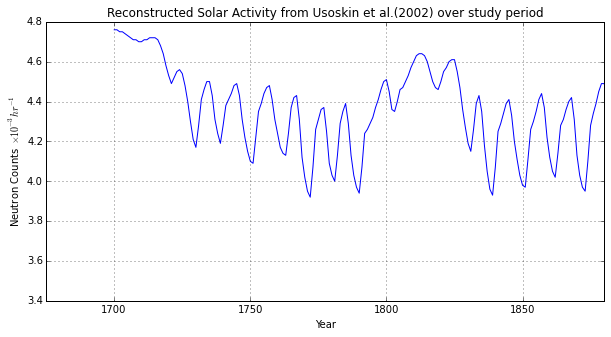

In [6]:
# Old fashioned plot
fig3 = plt.figure()
fig3.set_size_inches(10,5) 
ax1 = fig3.add_subplot(111) 
ax1.plot(Solar.index[0:36],Solar.Counts[0:36],'-b') # Jump in data (not handeld well by plot)
ax1.plot(Solar.index[36:],Solar.Counts[36:],'-b')
ax1.set_xlabel('Year')
ax1.set_xlim(1675,1880)
ax1.set_ylabel(r'Neutron Counts $\times10^{-3} hr^{-1}$')
ax1.set_title(r'Reconstructed Solar Activity from Usoskin et al.(2002) over study period')
plt.grid(True)
plt.show(fig1)


nb. *Data suggests some long term variability in solar cycles during the study period. It is not the case that a solar max or solar min over the 11-year cycle are necessarily above/below long term average.*

Indeed, this is partially taken into account as in the original paper the authours write "...we categorized all children born between 1800 and 1825 as part of the solar minimum period as the sunspot peaks during this period were most of the time below (mean: 20.1, range: 0 – 47.5) the mean number of sunspots for the entire study period." 

## Stats of solar max and solar min group and Fertility ##

In [7]:
# Load an enhanced copy of Figure 2 from Skjaervo et al. (2014)
# The significant fertility result in low-status (poor) females will be tested first.
Image(url='http://www.files.benlaken.com/documents/Norway_solar_fig2.png')

Reconstructing data of figure 2: 
>Fertility (mean + s.e.) in relation to solar activity for men and for women in relation to socioeconomic status. *p , 0.05. Dark grey bars denote SSmax, light grey bars denote SSmin.

Notes: Fertility = Total Number of children per person. Data from both communities (Groups), data divided by gender, and, for women, social status.

In [8]:
print('Adult Men with >0 Kids:',len(Adults.NumKids[(Adults.Gender == 'M')&(Adults.NumKids > 0)]))
print('Adult Women with >0 Kids:',len(Adults.NumKids[(Adults.Gender == 'F')&(Adults.NumKids > 0)]))

Adult Men with >0 Kids: 1629
Adult Women with >0 Kids: 1738


This is strange; already I have a diffrent result to the original paper. They report:

>*Third, we analysed potential effects of solar activity during early life on adult survival and fitness by restricting our sample to individuals who survived to adult- hood, got married and sired at least one child. Consequently, we excluded individuals who were either unmarried (925 indi- viduals) or emigrated (1422 individuals). We also excluded individuals with incomplete data (1375 individuals), thus leaving full-life-history information on **1498 women** and **1623 men**.*

In [9]:
def GenFertilityStats(Gender,Sphase):
    '''Function to convienently generate a dictionary object of statistics.
    Gender can be either M or F
    Sphase can be either MAX or MIN
    This will return a dictionary of mean, count, std, and s.e. statistics for Fertility.
    '''
    tmp={}
    stats = ['count','mean','std','se']
    sep='_'
    for metric in stats:
        if metric == 'mean':
            tmp[metric]=(mean(Adults.NumKids[(Adults.Gender == Gender)&(Adults.SolarPhase == Sphase)]))
        if metric == 'count':
            tmp[metric]=(len(Adults.NumKids[(Adults.Gender == Gender)&(Adults.SolarPhase == Sphase)]))
        if metric == 'std':
            tmp[metric]=(std(Adults.NumKids[(Adults.Gender == Gender)&(Adults.SolarPhase == Sphase)]))
        if metric == 'se':
            tmp[metric]=(tmp['std']/np.sqrt(tmp['count']-1))
    return tmp


def GenFertilityStats_byClass(Gender,Sphase,Class):
    '''Function to convienently generate a dictionary object of statistics.
    Gender can be either M or F
    Sphase can be either MAX or MIN
    Class can be either High or Low (SocialStatus)
    This will return a dictionary of mean, count, std, and s.e. statistics for Fertility.
    '''
    tmp={}
    stats = ['count','mean','std','se']
    sep='_'
    for metric in stats:
        if metric == 'mean':
            tmp[metric]=(mean(Adults.NumKids[(Adults.Gender == Gender)&(Adults.SolarPhase == Sphase)
                                                                        &(Adults.SocialStatus == Class)]))
        if metric == 'count':
            tmp[metric]=(len(Adults.NumKids[(Adults.Gender == Gender)&(Adults.SolarPhase == Sphase)
                                                                       &(Adults.SocialStatus == Class)]))
        if metric == 'std':
            tmp[metric]=(std(Adults.NumKids[(Adults.Gender == Gender)&(Adults.SolarPhase == Sphase)
                                                                       &(Adults.SocialStatus == Class)]))
        if metric == 'se':
            tmp[metric]=(tmp['std']/np.sqrt(tmp['count']-1))
    return tmp

In [10]:
print('Fertility Summary statistics')
M_SMAX_fertility = GenFertilityStats(Gender='M',Sphase='MAX')
M_SMIN_fertility = GenFertilityStats(Gender='M',Sphase='MIN')
F_SMAX_lowclass = GenFertilityStats_byClass(Gender='F',Sphase='MAX',Class='Low')
F_SMIN_lowclass = GenFertilityStats_byClass(Gender='F',Sphase='MIN',Class='Low')
F_SMAX_highclass = GenFertilityStats_byClass(Gender='F',Sphase='MAX',Class='High')
F_SMIN_highclass = GenFertilityStats_byClass(Gender='F',Sphase='MIN',Class='High')

print('M_SMAX_fertility',M_SMAX_fertility)
print('M_SMIN_fertility',M_SMIN_fertility)
print('F_SMAX_lowclass',F_SMAX_lowclass)
print('F_SMIN_lowclass',F_SMIN_lowclass)
print('F_SMAX_highclass',F_SMAX_highclass)
print('F_SMIN_highclass',F_SMIN_highclass)

Fertility Summary statistics
M_SMAX_fertility {'count': 349, 'std': 3.0312775807236139, 'se': 0.16249353454332857, 'mean': 4.8567335243553007}
M_SMIN_fertility {'count': 1369, 'std': 2.9004457734989377, 'se': 0.078419072548285243, 'mean': 4.8816654492330169}
F_SMAX_lowclass {'count': 125, 'std': 2.7438250673102322, 'se': 0.24640276496144514, 'mean': 3.6320000000000001}
F_SMIN_lowclass {'count': 496, 'std': 2.6852893649894209, 'se': 0.12069478136999162, 'mean': 4.094758064516129}
F_SMAX_highclass {'count': 239, 'std': 2.9655444489348946, 'se': 0.19222769541590501, 'mean': 5.1464435146443517}
F_SMIN_highclass {'count': 983, 'std': 2.8655714739282714, 'se': 0.091444060294410295, 'mean': 5.1749745676500511}


(Quite unequal samples: Male Solar max population is 349 individuals, but Solar min is 1369)

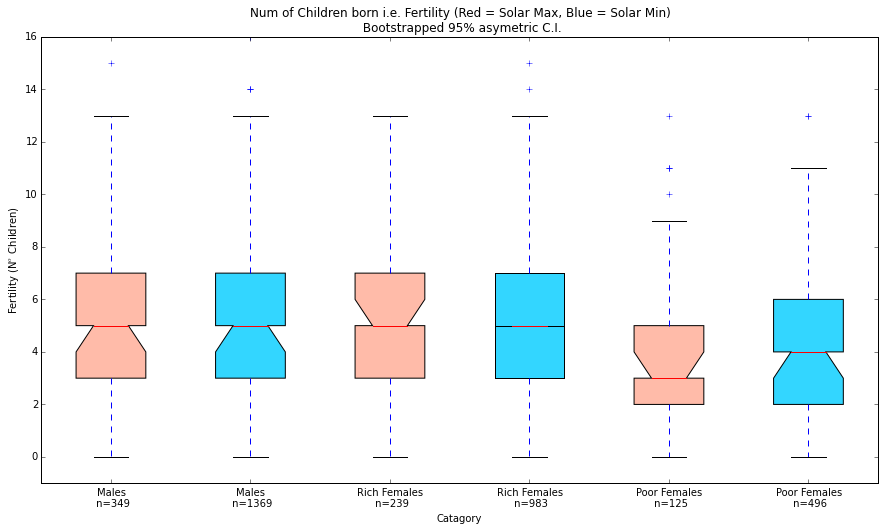

In [11]:
data = [
    Adults.NumKids[(Adults.Gender == 'M')&(Adults.SolarPhase == 'MAX')],
    Adults.NumKids[(Adults.Gender == 'M')&(Adults.SolarPhase == 'MIN')],
    Adults.NumKids[(Adults.Gender == 'F')&(Adults.SolarPhase == 'MAX')&(Adults.SocialStatus == 'High')],
    Adults.NumKids[(Adults.Gender == 'F')&(Adults.SolarPhase == 'MIN')&(Adults.SocialStatus == 'High')],
    Adults.NumKids[(Adults.Gender == 'F')&(Adults.SolarPhase == 'MAX')&(Adults.SocialStatus == 'Low')],
    Adults.NumKids[(Adults.Gender == 'F')&(Adults.SolarPhase == 'MIN')&(Adults.SocialStatus == 'Low')],
        ]

labels = list(['Males \n n=349',
               'Males \n n=1369',
               'Rich Females \n n=239',
               'Rich Females \n n=983',
               'Poor Females \n n=125',
               'Poor Females \n n=496'])

fig5 = plt.figure()
fig5.set_size_inches(15,8) 
ax1 = fig5.add_subplot(111) 
box = ax1.boxplot(data,notch=True,sym='b+',vert=True,bootstrap=10000,patch_artist=True)

colors = ['#FFBBA9', '#33D6FF', '#FFBBA9', '#33D6FF', '#FFBBA9','#33D6FF']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_ylim(-1,16)
ax1.set_title('Num of Children born i.e. Fertility (Red = Solar Max, Blue = Solar Min)  \n Bootstrapped 95% asymetric C.I.')
ax1.set_xlabel('Catagory')
ax1.set_ylabel(r'Fertility (N$^{o}$ Children)')
ax1.set_xticklabels(labels)
plt.show(fig5)
#plt.savefig("boxplots.png",dpi=100,transparent=True)

*n.b. Bootstrapped confidence intervals around the median of notched boxplots (95% confidence level).*

In [12]:
# Small sanity check: Number of children born for Men and Women should be approx equal as they should be the same children
print('Total Children of Men:',len(Adults.NumKids[(Adults.Gender == 'M')]))
print('Total Children of Women:',len(Adults.NumKids[(Adults.Gender == 'F')]))
print('Unclaimed Children:',len(Adults.NumKids[(Adults.Gender == 'F')]) - len(Adults.NumKids[(Adults.Gender == 'M')]))

Total Children of Men: 1718
Total Children of Women: 1843
Unclaimed Children: 125


###So, it seems there is a potential sample diffrence for Poor Females here. As Skjaervo et al. (2014) reported. Time for a further test of this with a Monte Carlo to see if this diffrence is really *p*<0.05###

Approach to the Monte Carlo test: Test the hypothesis that the Median diffrence between the Fertility (Number of Children born) to Poor Females was statstically significantly diffrent between the Solar Max and Solar Min Samples from random cases (i.e. in the absence of the proposed causal factor).

To do this I will generate two large populations of Median values basd on the entirety of the Poor Female dataset. Where the medians are calculated from randomly selected samples of n = 125, and n = 496 individuals respectivley. These will be used to determine a cumulative density function (CDF) of the null hypothesis cases, against which to evaluate the Smax and Smin samples respectivley. 

In [13]:
NumKids_poor_females = Adults.NumKids[(Adults.Gender == 'F')&(Adults.SocialStatus == 'Low')]

MC_size = 100000
pop_n125 = []
pop_n496 = []
pop_n125=[mean(random.choice(NumKids_poor_females,size=125)) for n in range(MC_size)] # Yep, it's just that easy.
pop_n496=[mean(random.choice(NumKids_poor_females,size=496)) for n in range(MC_size)] # A one line MC. Hooray Python!

pop_125_hist, bins = np.histogram(pop_n125, bins=arange(3.0, 5.0, 0.025))  # Bin the MC data to generate a PDF
pop_496_hist, bins = np.histogram(pop_n496, bins=arange(3.0, 5.0, 0.025))  # will do this manually for more flexibility

In [14]:
# -- Calculate the PDFs for the two MC samples and create a step plot with Gaussian fit---
density_125 = pop_125_hist/sum(pop_125_hist)       # Normalize the population to 1.0
step = (bins[1] - bins[0]) *0.5                    # need to center the bins:
bcenter = [ bpos + step for bpos in bins[:-1]]     
width = bins[1] - bins[0]
xx = np.ravel(zip(bins[0:-1], bins[0:-1] + width))
yy = np.ravel(zip(density_125, density_125))

density_496 = pop_496_hist/sum(pop_496_hist)
yy2 = np.ravel(zip(density_496, density_496))

# Create ideal Gaussian distributions 
mu, sigma = np.mean(pop_n125), np.std(pop_n125)        # Idealized Gaussian...
ygauss = normpdf(bins, mu, sigma)                      # ...a np function to generate a Gaussian pdf
ynormgauss = ygauss/sum(ygauss)                        #...a normalized guassian function

mu2, sigma2 = np.mean(pop_n496), np.std(pop_n496)      # More clunky boiler plate code (I should function this)
ygauss2 = normpdf(bins, mu2, sigma2)                      
ynormgauss2 = ygauss2/sum(ygauss2)                        

Probability Density Functions of 100k samples from poor female data


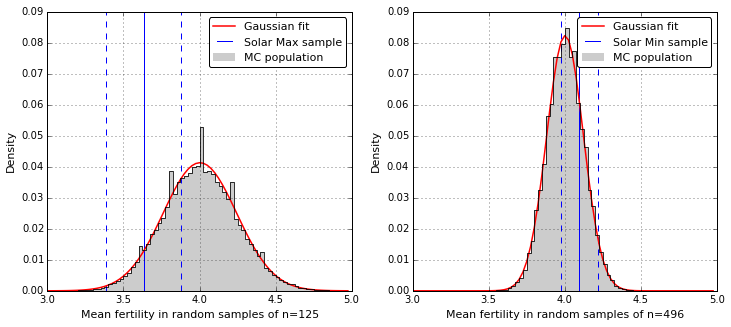

In [15]:
print('Probability Density Functions of 100k samples from poor female data')
#-----Plotting-----
my_hist1 = plt.figure()
my_hist1.set_size_inches(12,5)            # Specify the output size
ax1 = my_hist1.add_subplot(121)              # Add an axis frame object to the plot (i.e. a pannel)
ax2 = my_hist1.add_subplot(122)              # Add an axis frame object to the plot (i.e. a pannel)

# first pannel
ax1.bar(bins[0:-1], density_125, width=width, facecolor='k',linewidth=0.0,alpha=0.2)  # Filled bars
ax1.plot(bins,ynormgauss,'r-',linewidth=1.5)                                          # Ideal Gaussian line
ax1.vlines(F_SMAX_lowclass['mean'], 0.0, 0.1,colors='b')                              # Marker line of Mean
ax1.grid(True)
ax1.set_ylabel(r'Density',fontsize=11)
ax1.set_xlabel('Mean fertility in random samples of n=125',fontsize=11)
leg1=ax1.legend(['Gaussian fit','Solar Max sample','MC population',],prop={'size':11},
                numpoints=1,markerscale=5.,frameon=True,fancybox=True)
leg1.get_frame().set_alpha(1.0)                # Make the ledgend semi-transparent
ax1.plot(xx, yy, 'k',alpha=0.8)                # Edges for the step plot
ax1.vlines(F_SMAX_lowclass['mean']+F_SMAX_lowclass['se'], 0.0, 0.1,colors='b',linestyle='dashed')
ax1.vlines(F_SMAX_lowclass['mean']-F_SMAX_lowclass['se'], 0.0, 0.1,colors='b',linestyle='dashed')
ax1.set_ylim(0.00,0.09)

# -- second pannel
ax2.bar(bins[0:-1], density_496, width=width, facecolor='k',linewidth=0.0,alpha=0.2)  # Filled bars
ax2.plot(bins,ynormgauss2,'r-',linewidth=1.5) # Ideal Gaussian line
ax2.vlines(F_SMIN_lowclass['mean'], 0.0, 0.1,colors='b')  
ax2.grid(True)
ax2.set_ylabel(r'Density',fontsize=11)
ax2.set_xlabel('Mean fertility in random samples of n=496',fontsize=11)
leg2=ax2.legend(['Gaussian fit','Solar Min sample','MC population',],prop={'size':11},
                numpoints=1,markerscale=5.,frameon=True,fancybox=True)
leg2.get_frame().set_alpha(1.0)                # Make the ledgend semi-transparent
ax2.plot(xx, yy2, 'k',alpha=0.8)                # Edges for the step plot
ax2.vlines(F_SMIN_lowclass['mean']+F_SMIN_lowclass['se'], 0.0, 0.1,colors='b',linestyle='dashed')
ax2.vlines(F_SMIN_lowclass['mean']-F_SMIN_lowclass['se'], 0.0, 0.1,colors='b',linestyle='dashed')
ax2.set_ylim(0.00,0.09)
#plt.show(my_hist1)
plt.savefig("Solar_norway_distrib.png",dpi=100,transparent=True)

Assuming a one tailed test (i.e. a strong increase in fertility during solar maximum would have been considerd a null result), therefore all alpha should be in the lower tail. 

In [16]:
# Use a percentile rank function to find the rank of a given value:
print('Means ±S.E. of Poor Female sample during Solar Maximum (n=125)')
print('F_SMAX_lowclass:',F_SMAX_lowclass['mean'],'±',F_SMAX_lowclass['se'])
print('Percentile rank compared to random (null) MC-cases:')
print('Percentile of mean:',stats.percentileofscore(pop_n125, F_SMAX_lowclass['mean'])) 
print('Percentile of lower CI:',stats.percentileofscore(pop_n125, F_SMAX_lowclass['mean']+F_SMAX_lowclass['se'])) 
print('Percentile of upper CI:',stats.percentileofscore(pop_n125, F_SMAX_lowclass['mean']-F_SMAX_lowclass['se'])) 

Means ±S.E. of Poor Female sample during Solar Maximum (n=125)
F_SMAX_lowclass: 3.632 ± 0.246402764961
Percentile rank compared to random (null) MC-cases:
Percentile of mean: 6.0515
Percentile of lower CI: 30.229
Percentile of upper CI: 0.434


In [17]:
# Use a percentile rank function to find the rank of a given value:
print('Means ±S.E. of Poor Female sample during Solar Minimum (n=496)')
print('F_SMAX_lowclass:',F_SMIN_lowclass['mean'],'±',F_SMIN_lowclass['se'])
print('Percentile rank compared to random (null) MC-cases:')
print('Percentile of mean:',stats.percentileofscore(pop_n496, F_SMIN_lowclass['mean'])) 
print('Percentile of lower CI:',stats.percentileofscore(pop_n496, F_SMIN_lowclass['mean']+F_SMIN_lowclass['se'])) 
print('Percentile of upper CI:',stats.percentileofscore(pop_n496, F_SMIN_lowclass['mean']-F_SMIN_lowclass['se'])) 

Means ±S.E. of Poor Female sample during Solar Minimum (n=496)
F_SMAX_lowclass: 4.09475806452 ± 0.12069478137
Percentile rank compared to random (null) MC-cases:
Percentile of mean: 77.817
Percentile of lower CI: 95.965
Percentile of upper CI: 41.221
